In [120]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)


(1797, 64)
(1797, 8, 8)
(1797,)


<Figure size 432x288 with 0 Axes>

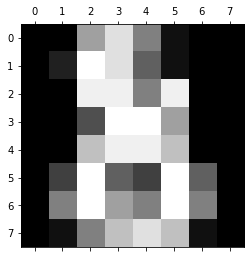

<class 'numpy.float64'>


In [121]:
# Show one data

plt.gray() 
plt.matshow(digits.images[1796]) 
plt.show() 
print(type(digits.images[1796][0][0]))

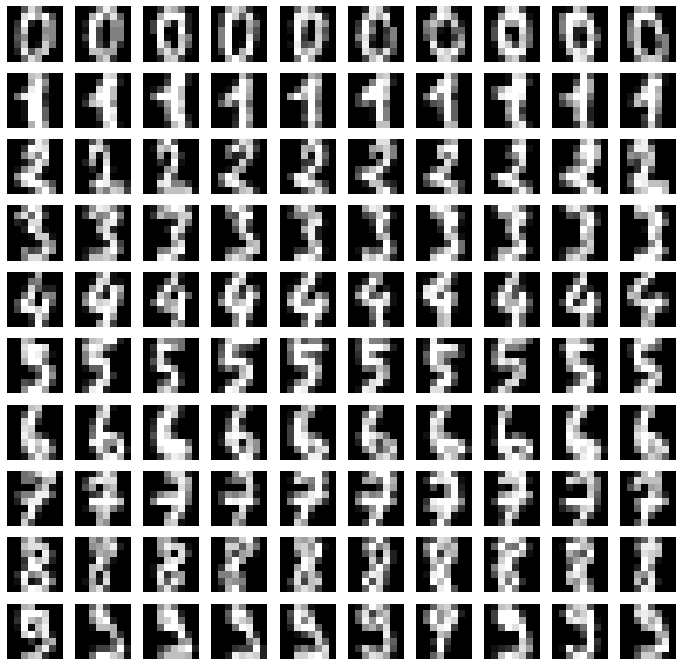

In [122]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

n_digits = np.unique(Y)
M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

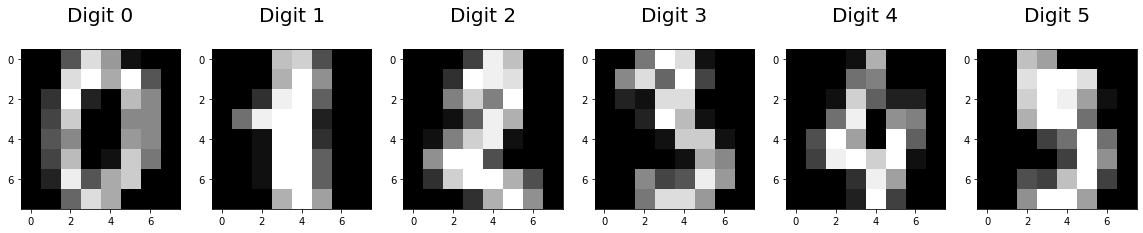

In [123]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):
 plt.subplot(1, 6, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Digit %i\n' % label, fontsize = 20)

## 1) Get and understand your data

what is the type of the data ? 

-> The data is a set of bitmap picture objects.

How many pixel has one data instance ? 

-> Each picture is made of 64 pixel (8x8 image).

What is the type of data of one pixel ? what does it represents ?

-> A pixel is a float64 representing the grayscale of that pixel.

## 2) Prepare your ML algorithm

**Write the equation of the precision and recall score and explicit what each terms represents.**

"Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned."

Precision:

$P = T_p / (T_p + F_p)$

Where $T_p$ is the True Positive and $F_p$ is the False Positive.

Recall:

$R = T_p / (T_p + F_n)$

Where $F_n$ is the False Negative


**Explain the purpose of the training set ?**

-> The purpose of the training set is to train the model to obtain predictions.

**Explain the purpose of the testing set ?**

-> The purpose of the test set is to validate the predictions against the training set. The test set is necessary to obtain the precision-recall values.

## 3) Predict Digits

In [124]:
# We only keep the digit '7' with a value of 1 and put other digits at 0:
Y7 = digits.target
Y7[Y7 != 7] = 0
Y7[Y7 == 7] = 1
Y7[0:50]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0])

In [138]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, Y7, test_size=0.20, random_state=0, shuffle=False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_train[0:50]

(1437, 64)
(1437,)
(360, 64)
(360,)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0])

We test Logistic Regression, SVM, and KNN, and compare their results (precision, recall, and time taken to fit):

### Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
import time

logisticRegr = LogisticRegression(max_iter=2000)
t0 = time.time()
logisticRegr.fit(x_train, y_train)
t1 = time.time()
print("Duration: ", (t1 - t0))

# Predict for One Observation (image)
logisticRegr.predict(x_test[7].reshape(1,-1))
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

Duration:  0.29973578453063965
0.9861111111111112


In [153]:
from sklearn.metrics import average_precision_score

y_score = logisticRegr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.13358184458131517


In [157]:
from sklearn.metrics import precision_score, recall_score

logreg_y_predict_train = logisticRegr.predict(x_train)
logreg_y_predict_test = logisticRegr.predict(x_test)

logreg_precision_train = precision_score(y_train, logreg_y_predict_train)
logreg_precision_test = precision_score(y_test, logreg_y_predict_test)
logreg_recall_train = recall_score(y_train, logreg_y_predict_train)
logreg_recall_test = recall_score(y_test, logreg_y_predict_test)

print(logreg_precision_train)
print(logreg_precision_test)
print(logreg_recall_train)
print(logreg_recall_test)

1.0
1.0
1.0
0.8611111111111112


### SVM

In [164]:
from sklearn.svm import SVC

clfSVC = SVC()
t0 = time.time()
clfSVC.fit(x_train, y_train)
t1 = time.time()
print("Duration: ", (t1 - t0))

clfSVC_score = clfSVC.score(x_test, y_test)
clfSVC_predict = clfSVC.predict(x_test)
print(clfSVC_score)
#print(clfSVC_predict)

Duration:  0.04129743576049805
0.9944444444444445


In [158]:
clfSVC_y_predict_train = clfSVC.predict(x_train)
clfSVC_y_predict_test = clfSVC.predict(x_test)

clfSVC_precision_train = precision_score(y_train, clfSVC_y_predict_train)
clfSVC_precision_test = precision_score(y_test, clfSVC_y_predict_test)
clfSVC_recall_train = recall_score(y_train, clfSVC_y_predict_train)
clfSVC_recall_test = recall_score(y_test, clfSVC_y_predict_test)

print(clfSVC_precision_train)
print(clfSVC_precision_test)
print(clfSVC_recall_train)
print(clfSVC_recall_test)

1.0
1.0
0.993006993006993
0.9444444444444444


### K Nearest Neighbors

In [165]:
from sklearn.neighbors import KNeighborsClassifier

clfKNN = KNeighborsClassifier()
t0 = time.time()
clfKNN.fit(x_train, y_train)
t1 = time.time()
print("Duration: ", (t1 - t0))

clfKNN_score = clfKNN.score(x_test, y_test)
clfKNN_predict = clfKNN.predict(x_test)
print(clfKNN_score)
#print(clfKNN_predict)

Duration:  0.02233099937438965
0.9944444444444445


In [163]:
clfKNN_y_predict_train = clfKNN.predict(x_train)
clfKNN_y_predict_test = clfKNN.predict(x_test)

clfKNN_precision_train = precision_score(y_train, clfKNN_y_predict_train)
clfKNN_precision_test = precision_score(y_test, clfKNN_y_predict_test)
clfKNN_recall_train = recall_score(y_train, clfKNN_y_predict_train)
clfKNN_recall_test = recall_score(y_test, clfKNN_y_predict_test)

print(clfKNN_precision_train)
print(clfKNN_precision_test)
print(clfKNN_recall_train)
print(clfKNN_recall_test)

0.993006993006993
0.9473684210526315
0.993006993006993
1.0
